In [1]:
####################################  WEST NILE VIRUS ######################################
# BY : SHUBHAM BARUDWALE

In [2]:
# IMPORTANT NOTE : PLEASE DO NOT RE RUN THE NOTEBOOK UNTIL YOU HAVE DATA AND ALL REQUIRED LIBRARIES 
#                  ELSE YOU WILL NOT ABLE TO SEE THE RESULTS

In [3]:
# APPLYING NEURAL NETWORKS ON TRAINING DATA

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/Users/ericliao/PycharmProjects/phd_class_code/Lab_work/fun_project/WNV_kaggle/predict-west-nile-virus/west_nile/input/train.csv')

In [6]:
data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [7]:
################# MANUAL IMPLEMENTATION OF NEURAL NETWORKS #######################

In [8]:
X = data.values[:,7:11]
Y = data.values[:,11]

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [10]:
print('Rows: %d, columns: %d'% (X_train.shape[0], X_train.shape[1]))
print('Rows: %d, columns: %d'% (X_test.shape[0], X_test.shape[1]))

Rows: 7354, columns: 4
Rows: 3152, columns: 4


In [11]:
from scipy.special import expit
import sys

class NeuralNetMLP(object):
    def __init__(self, n_output, n_features, n_hidden=30,
            l1=0.0, l2=0.0, epochs=500, eta=0.001,
            alpha=0.0, decrease_const=0.0, shuffle=True,
            minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
    
    def _encode_labels(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    
    def _initialize_weights(self):
        w1 = np.random.uniform(-1.0, 1.0,size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0,size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2
    
    def _sigmoid(self, z):
        # expit is equivalent to 1.0/(1.0 + np.exp(-z))
        return expit(z)
    
    def _sigmoid_gradient(self, z):
        sg = self._sigmoid(z)
        return sg * (1 - sg)
    
    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new
    
    def _feedforward(self, X, w1, w2):
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3
    
    def _L2_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2)\
            + np.sum(w2[:, 1:] ** 2))
    
    def _L1_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum()\
            + np.abs(w2[:, 1:]).sum())
    
    def _get_cost(self, y_enc, output, w1, w2):
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost
    
    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)
        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))
        return grad1, grad2
    
    def predict(self, X):
        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False):
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)
        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)
        for i in range(self.epochs):
            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)
            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()
            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_data = X_data[idx], y_data[idx]
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)

            for idx in mini:
                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(
                X[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],output=a3,w1=self.w1,w2=self.w2)
                self.cost_.append(cost)
                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,a3=a3, z2=z2,y_enc=y_enc[:, idx],w1=self.w1,w2=self.w2)
                # update weights
                delta_w1, delta_w2 = self.eta * grad1,\
                self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2
        return self

In [12]:
 nn = NeuralNetMLP(n_output=20,
        n_features=X_train.shape[1],
        n_hidden=50,
        l2=0.1,
        l1=0.0,
        epochs=200,           
        eta=0.001,
        alpha=0.001,
        decrease_const=0.00001,
        shuffle=True,
        minibatches=50,
        random_state=1)

In [13]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 200/200

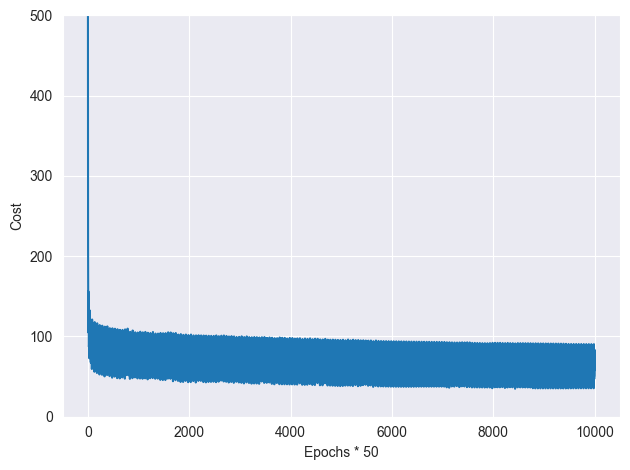

In [14]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 500])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

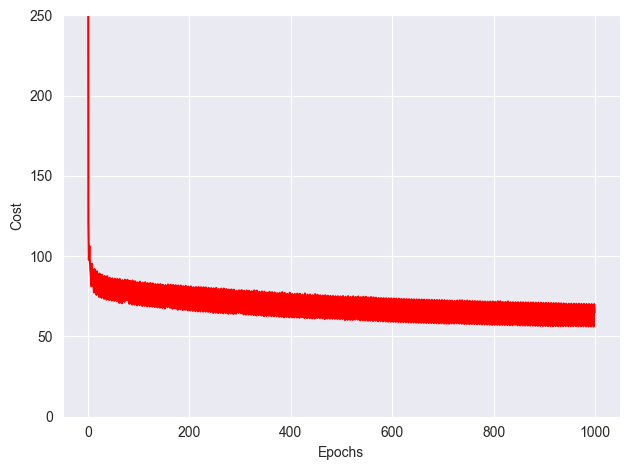

In [15]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)),cost_avgs,color='red')
plt.ylim([0, 250])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [16]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 94.49%


In [17]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 95.37%


In [18]:
###### IMPLEMENTATION OF SCIKIT LEARN NEURAL NETWORK ######

In [19]:
from sklearn import neural_network

In [20]:
nns=neural_network.MLPClassifier(hidden_layer_sizes=(100, ), 
                                 activation='relu', solver='adam', alpha=0.0001, 
                                 batch_size='auto', learning_rate='constant', 
                                 learning_rate_init=0.001, power_t=0.5, max_iter=2000, 
                                 shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                                 warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                 early_stopping=False, validation_fraction=0.001, beta_1=0.9,
                                 beta_2=0.999, epsilon=1e-08)

In [21]:
X_train=np.array(list(X_train), dtype=np.int)
y_train=np.array(list(y_train), dtype=np.int)
X_test=np.array(list(X_test), dtype=np.int)
y_test=np.array(list(y_test), dtype=np.int)

/var/folders/9y/98pdwqnx3b5gb_f9td3f9h7r0000gn/T/ipykernel_32833/952025592.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.array(list(X_train), dtype=np.int)
/var/folders/9y/98pdwqnx3b5gb_f9td3f9h7r0000gn/T/ipykernel_32833/952025592.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

In [22]:
y_pred=nns.fit(X_train, y_train)

In [23]:
print("Accuracy on training set: {:.3f}".format(nns.score(X_train.astype(int),y_train.astype(int))))
print("Accuracy on test set: {:.3f}".format(nns.score(X_test.astype(int),y_test.astype(int))))

Accuracy on training set: 0.945
Accuracy on test set: 0.954


In [24]:
############################ DATA VISUALIZATION ############################

In [26]:
data_t=pd.read_csv('/Users/ericliao/PycharmProjects/phd_class_code/Lab_work/fun_project/WNV_kaggle/predict-west-nile-virus/west_nile/input/test.csv')

In [27]:
data_t

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
...,...,...,...,...,...,...,...,...,...,...,...
116288,116289,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX SALINARIUS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116289,116290,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TERRITANS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116290,116291,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TARSALIS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116291,116292,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",UNSPECIFIED CULEX,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8


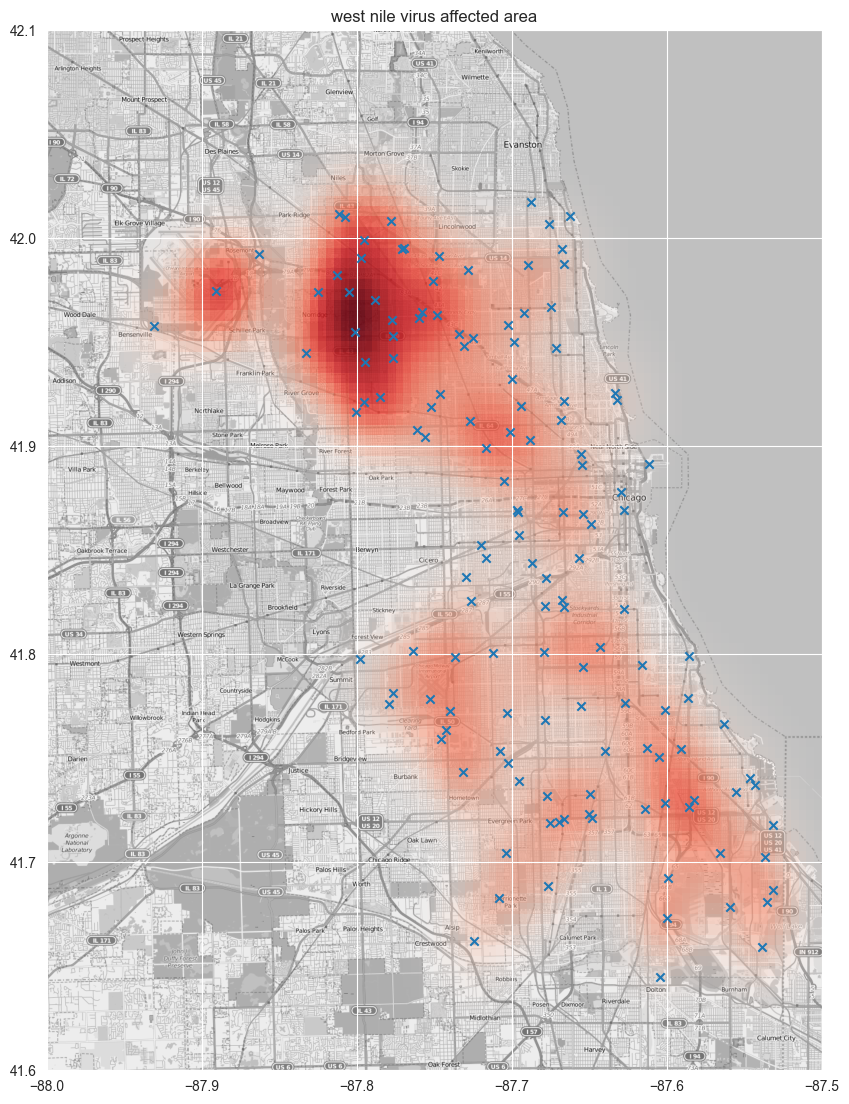

In [29]:
from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("/Users/ericliao/PycharmProjects/phd_class_code/Lab_work/fun_project/WNV_kaggle/predict-west-nile-virus/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('/Users/ericliao/PycharmProjects/phd_class_code/Lab_work/fun_project/WNV_kaggle/predict-west-nile-virus/west_nile/input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.title('west nile virus affected area')
plt.show()
# plt.savefig('heatmap.png')

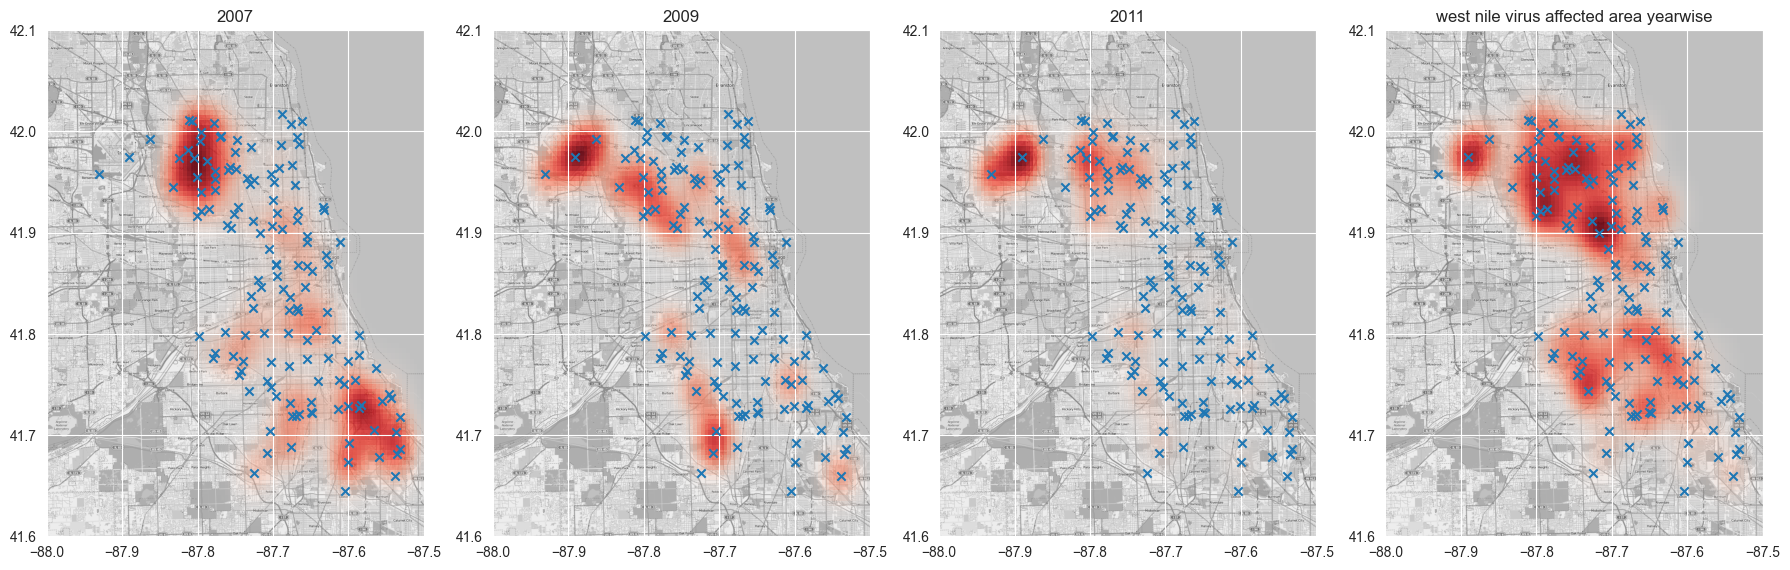

<Figure size 640x480 with 0 Axes>

In [30]:
mapdata = np.loadtxt("/Users/ericliao/PycharmProjects/phd_class_code/Lab_work/fun_project/WNV_kaggle/predict-west-nile-virus/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('/Users/ericliao/PycharmProjects/phd_class_code/Lab_work/fun_project/WNV_kaggle/predict-west-nile-virus/west_nile/input/train.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(18,16))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    plt.subplot(subplot)
    plt.gca().set_title(year)
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.title('west nile virus affected area yearwise')
plt.show()
plt.savefig('heatmap.png')

In [34]:
import chart_studio

/Library/Python/3.9/site-packages/chart_studio/tools.py:290: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if share_key is "":


In [37]:
import chart_studio.plotly as py
from plotly.graph_objs import *
sprey=pd.read_csv('/Users/ericliao/PycharmProjects/phd_class_code/Lab_work/fun_project/WNV_kaggle/predict-west-nile-virus/west_nile/input/spray.csv')[['Latitude','Longitude']]
trace1 = {
  "lat":sprey['Latitude'],
  "locationmode": "ISO-3", 
  "lon":sprey['Longitude'],
  "marker": {
    "cmax": 1.7398, 
    "cmin": -1.7398, 
    "symbol": "square"
  }, 
  "mode": "markers", 
  "type": "scattergeo"
}
data = Data([trace1])
layout = {


  "geo": {
    "countrycolor": "rgb(102, 102, 102)", 
    "countrywidth": 0.5, 
    "landcolor": "rgb(220, 220, 220)", 
    "lataxis": {"range": [41.6, 42.6]}, 
    "lonaxis": {"range": [-88.2, -87.5]}, 
    "projection": {"type": "albers usa"}, 
    "scope": "usa", 
    "showland": True, 
    "subunitcolor": "rgb(102, 102, 102)", 
    "subunitwidth": 0.5,
    "center":{"lat":42.1,
               "lon":-87.8}
  }, 
  "title": "Sprey Area"
}
fig = Figure(data=data, layout=layout)
plot_url = py.offline.plot(fig)

/Library/Python/3.9/site-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




PlotlyRequestError: Authentication credentials were not provided.

In [ ]:
# TO SEE THE MAP OUTPUT OF ABOVE CELL GO TO OUTPUT SECTION

In [ ]:
import itertools

mapdata = np.loadtxt("../input/predict-west-nile-virus/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../input/predict-west-nile-virus/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
sprey=pd.read_csv('../input/predict-west-nile-virus/spray.csv')[['Latitude','Longitude']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88.2, -87.5, 41.6, 42.5)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88.2, -87.5, 100), np.linspace(41.6, 42.5, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])



locations = sprey[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], alpha=0.8, color='yellow',marker=',')

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.title('Anti mosquito sprey done at yellow areas')
plt.show()

In [ ]:
########################### WEATHER DATA VISUALIZATION #######################

In [ ]:
data_we=pd.read_csv('../input/predict-west-nile-virus/weather.csv')
data_we

In [ ]:
data_we_st_1 = data_we.loc[data_we["Station"]==1]
data_we_st_2 = data_we.loc[data_we["Station"]==2]

In [ ]:
x=np.arange(0, 1472, 1)

In [ ]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print (__version__) # requires version >= 1.9.0

plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter(
    x=x,
    y=data_we_st_1['Tmax'],
    mode = 'lines',
    name = 'Max Temperature station 1'
    
)
trace2 = go.Scatter(
    x=x,
    y=data_we_st_1['Tmin'],
    mode = 'lines',
    name = 'Min Temperature station 1'
)

trace3 = go.Scatter(
    x=x,
    y=data_we_st_2['Tmax'],
    mode = 'lines',
    name = 'Max Temperature station 2'
    
)
trace4 = go.Scatter(
    x=x,
    y=data_we_st_2['Tmin'],
    mode = 'lines',
    name = 'Min Temperature station 2'
)

fig = tools.make_subplots(rows=1, cols=2)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 2)



fig['layout'].update(height=600, width=1000, title='Temperature vs Days')
plotly.offline.iplot(fig, filename='simple-subplot')

In [ ]:

import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

X = np.linspace(0,1472,1472)

# Create traces
trace0 = go.Scatter(
    x = X,
    y = data_we_st_1['StnPressure'],
    mode = 'lines+markers',
    name = 'StnPressure station 1',
    opacity=0.5

)

trace1 = go.Scatter(
    x = X,
    y = data_we_st_2['StnPressure'],
    mode = 'lines+markers',
    name = 'StnPressure station 2',
    opacity=0.7
)

layout = go.Layout(
    title='Air Pressure vs Days',
    xaxis=dict(
        title='Days',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Air Pressure',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='stter-mode')

In [ ]:

import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

X = np.linspace(0,1472,1472)

# Create traces
trace0 = go.Scatter(
    x = X,
    y = data_we_st_1['SeaLevel'],
    mode = 'lines+markers',
    name = 'SeaLevel station 1',
    opacity=0.5,
       marker = dict(
            color = 'blue',
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) )

)

trace1 = go.Scatter(
    x = X,
    y = data_we_st_2['SeaLevel'],
    mode = 'lines+markers',
    name = 'SeaLevel station 2',
    opacity=0.5,
    marker = dict(
            color = 'yellow',
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.1
            ) )
)

layout = go.Layout(
    title='Sea Level Record vs Days',
    xaxis=dict(
        title='Days',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sea Level',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='stter-mode')

In [ ]:
############### PAIR PLOT ############

In [ ]:
data_we=pd.read_csv('../input/weather-modified/weather_m.csv')

In [ ]:
import seaborn as sb
analysis = data_we[['Tmax','Tmin','Tavg','Depart','DewPoint','WetBulb','Heat','Cool','Sunrise','Sunset','SnowFall','PrecipTotal','StnPressure','SeaLevel','ResultSpeed','ResultDir','AvgSpeed','Station']]


In [ ]:
sb.pairplot(analysis,hue='Station')

In [ ]:
############### CORELATION MATRIX ###################

In [ ]:

from sklearn.feature_selection import f_regression
data=analysis
x_vars=list(data.drop('AvgSpeed',axis=1).columns.values) 
Y=data['AvgSpeed'].values
X=data.drop('AvgSpeed',axis=1) 

#produce F scores and p-values
F,p_val=f_regression(X,Y)

#split variables into two groups; statistically significant and insignificant at the 95% confidence level
signif_vars={var_name:p for var_name,p in zip(x_vars,p_val) if p<0.05}
insignif_vars={var_name:p for var_name,p in zip(x_vars,p_val) if p>0.05}

signif_vars

import seaborn as sns
import matplotlib.pyplot as plt
X_sel = data[list(signif_vars.keys())+['AvgSpeed']]

cor_mat = X_sel.corr()

f, ax = plt.subplots(figsize=(15, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);
plt.title('Correlation Heatmap between various factors')
plt.show()

In [ ]:
####################  MORE VISUALIZATION AND ANALYSIS #########################

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    y = analysis['Tmax'],
    name = "Max Temperature",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace1 = go.Box(
    y = analysis['Tmin'],
    name = "Min Temperature",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace2 = go.Box(
    y = analysis['Tavg'],
    name = "Average Temperature",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace3 = go.Box(
    y = analysis['Depart'],
    name = "Deparrture from normal",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

trace4 = go.Box(
    y = analysis['DewPoint'],
    name = "AVERAGE DEW POINT",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace5 = go.Box(
    y = analysis['WetBulb'],
    name = "AVERAGE WET BULB",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

trace6 = go.Box(
    y = analysis['StnPressure'],
    name = "Pressure in Inces of HG",
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)),
    line = dict(
        color = 'rgb(8,81,156)')
)

trace7 = go.Box(
    y = analysis['PrecipTotal'],
    name = "Total Precipitation",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = 'rgb(107,174,214)')
)

trace8 = go.Box(
    y = analysis['SeaLevel'],
    name = "AVERAGE SEA LEVEL PRESSURE",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(7,40,89)'),
    line = dict(
        color = 'rgb(7,40,89)')
)

trace9 = go.Box(
    y = analysis['AvgSpeed'],
    name = "SPEED IN MILES PER HOUR",
    boxpoints = False,
    marker = dict(
        color = 'rgb(9,56,125)'),
    line = dict(
        color = 'rgb(9,56,125)')
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

layout = go.Layout(
    title = "Basic analysis"
)

fig = go.Figure(data=data,layout=layout)
plotly.offline.iplot(fig, filename = "Basic analysis")

In [ ]:
analysis_st_1 = analysis.loc[analysis["Station"]==1]
analysis_st_2 = analysis.loc[analysis["Station"]==2]

In [ ]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

x1 = analysis_st_1['Tmax']  
x2 = analysis_st_2['Tmax']    
hist_data = [x1, x2]

group_labels = ['Station 1', 'Station 2']

colors = ['#3A4750', '#F64E8B']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5, curve_type='normal', colors=colors)

# Add title
fig['layout'].update(title='Maximum temperature with normal distribution')

# Plot!
plotly.offline.iplot(fig, filename='Maximum temperature with normal distribution')

In [ ]:
x1 = analysis_st_1['Tmin']  
x2 = analysis_st_2['Tmin']    
hist_data = [x1, x2]

group_labels = ['Station 1', 'Station 2']

colors = ['#3A4750', '#F64E8B']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.5, curve_type='normal', colors=colors)

fig['layout'].update(title='Minimum temperature with normal distribution')

plotly.offline.iplot(fig, filename='Minimum temperature with normal distribution')

In [ ]:
x1 = analysis_st_1['AvgSpeed'].astype(float)
x2 = analysis_st_2['AvgSpeed'].astype(float)

hist_data = [x1, x2]

group_labels = ['Station 1', 'Station 2']

colors = ['#3A4750', '#F64E8B']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5, curve_type='normal', colors=colors)

# Add title
fig['layout'].update(title='Average wind speed with normal distribution')

# Plot!
plotly.offline.iplot(fig, filename='Average wind speed with normal distribution')

In [ ]:
x1 = analysis_st_1['Heat'].astype(float) 
x2 = analysis_st_2['Heat'].astype(float)

hist_data = [x1, x2]

group_labels = ['Station 1', 'Station 2']
colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig['layout'].update(title='Heat Distribution')

# Plot!
plotly.offline.iplot(fig, filename='Curve and Rug')

In [ ]:
t = np.linspace(-1, 1.2, 2000)
x = analysis['Tavg']
y = analysis['AvgSpeed']

colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]

fig = ff.create_2d_density(
    x, y, colorscale=colorscale,
    hist_color='rgb(255, 237, 222)', point_size=3,
    
)

fig['layout'].update(title='Average Temperature vs Average Speed Density Map')

plotly.offline.iplot(fig, filename='histogram_subplots')

In [ ]:
data_we=pd.read_csv('../input/weather-modified/weather_m.csv')
data_we
analysis = data_we[['WetBulb','PrecipTotal','ResultDir','DewPoint','AvgSpeed','Station']]
import plotly.plotly as py
import plotly.figure_factory as ff

fig = ff.create_scatterplotmatrix(analysis, diag='box', index='Station',
                                  height=800, width=800)
plotly.offline.iplot(fig, filename='Box plots along Diagonal Subplots')